<a href="https://colab.research.google.com/github/amalia1501/4GeeksAcademy_perfil/blob/master/Trabajo_Explaratorio_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data = pd.read_csv(url, header=None, na_values=" ?")
# Se etiquetan las columnas para poder interpretar más fácilmente los datos.
# Cada fila es un ejemplo, cada columna un atributo.
# La columna llamada C es el atributo a predecir
data.columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation',
              'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hpw', 'Country', 'C']
data.head()



,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-num   32561 non-null  int64 
 5   Marital-status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-gain    32561 non-null  int64 
 11  Capital-loss    32561 non-null  int64 
 12  Hpw             32561 non-null  int64 
 13  Country         31978 non-null  object
 14  C               32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
data.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education-num        0
Marital-status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hpw                  0
Country            583
C                    0
dtype: int64

In [5]:
dup=data.duplicated().sum()
print(dup)

24


In [6]:
registros_dup=data[data.duplicated(keep=False)]
registros_dup

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
2303,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
3917,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
4325,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4767,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4940,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,>50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
5579,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
5805,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
5842,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data['Capital-gain'].value_counts()

Capital-gain
0        29825
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: count, Length: 119, dtype: int64

In [9]:
cols_drop=['Fnlwgt','Relationship','Education-num','Capital-gain','Capital-loss']
data.drop(cols_drop,axis=1,inplace=True)

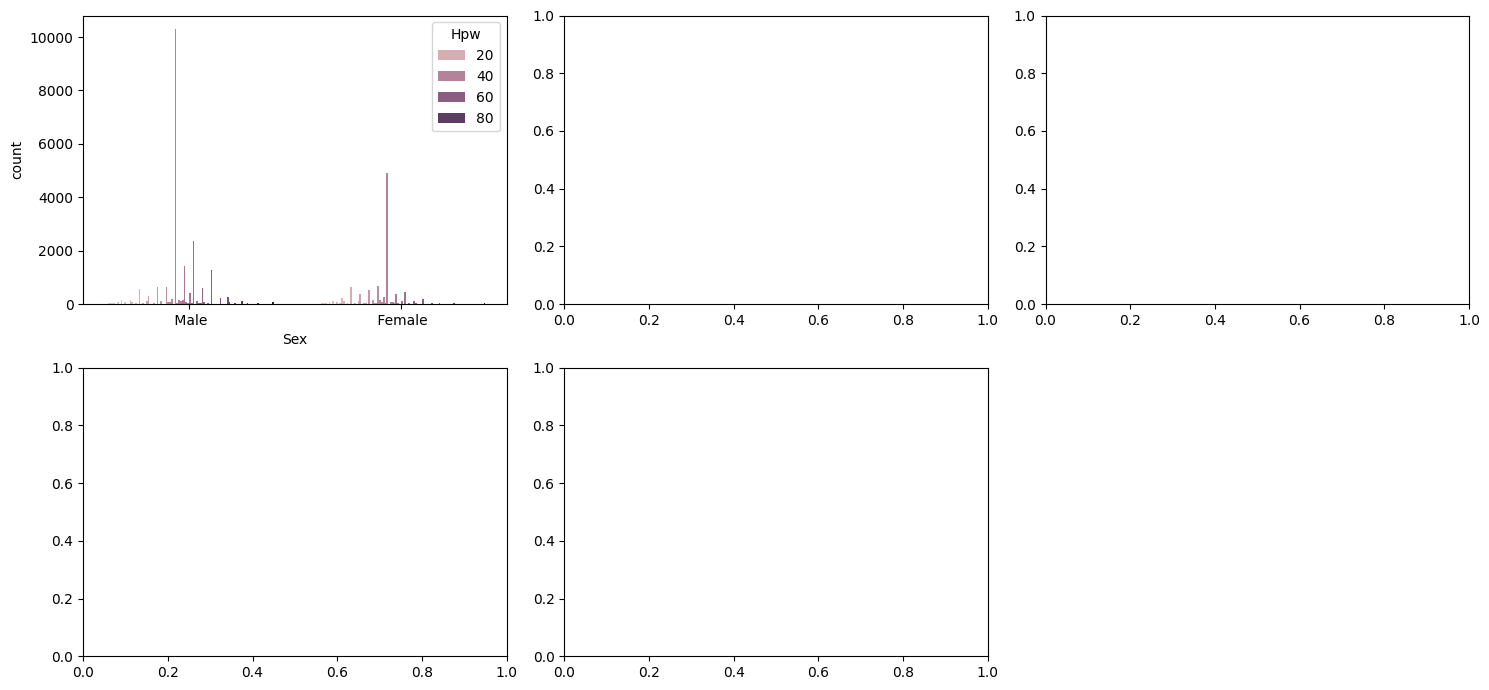

In [15]:
fig, axis = plt.subplots(2, 3, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = data, x = "Sex", hue = "Hpw")


plt.tight_layout()
fig.delaxes(axis[1, 2])

plt.show()

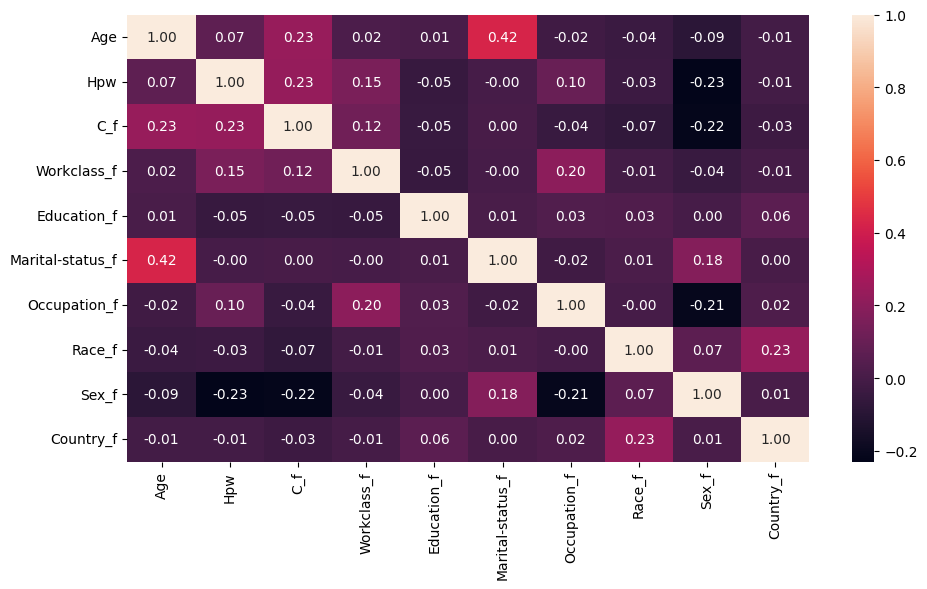

In [13]:
# Analisis de Correlaciones

data["Workclass_f"] = pd.factorize(data["Workclass"])[0]
data["Education_f"] = pd.factorize(data["Education"])[0]
data["Marital-status_f"] = pd.factorize(data["Marital-status"])[0]
data['Occupation_f']=pd.factorize(data["Occupation"])[0]
data['Race_f']=pd.factorize(data["Race"])[0]
data['Sex_f']=pd.factorize(data["Sex"])[0]
data['Country_f']=pd.factorize(data["Country"])[0]
data['C_f']=pd.factorize(data["C"])[0]
fig, axis = plt.subplots(figsize = (10, 6))
matriz_corr=data[['Age','Hpw','C_f','Workclass_f','Education_f','Marital-status_f','Occupation_f','Race_f','Sex_f','Country_f']].corr()
#print(matriz_corr)
sns.heatmap(matriz_corr, annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [19]:
data= data.dropna()

In [20]:
# Valores atipicos Age y Hpw
age_c = data["Age"].describe()


age_iqr = age_c["75%"] - age_c["25%"]
upper_limit = age_c["75%"] + 1.5 * age_iqr
lower_limit = age_c["25%"] - 1.5 * age_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(age_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 75.5 y -0.5, con un rango intercuartílico de 19.0


In [21]:
data=data[data['Age']<=75.5]

In [22]:
hpw_c = data["Hpw"].describe()

hpw_iqr = hpw_c["75%"] - hpw_c["25%"]
upper_limit = hpw_c["75%"] + 1.5 * hpw_iqr
lower_limit = hpw_c["25%"] - 1.5 * hpw_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(hpw_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 52.5 y 32.5, con un rango intercuartílico de 5.0


<Axes: ylabel='Hpw'>

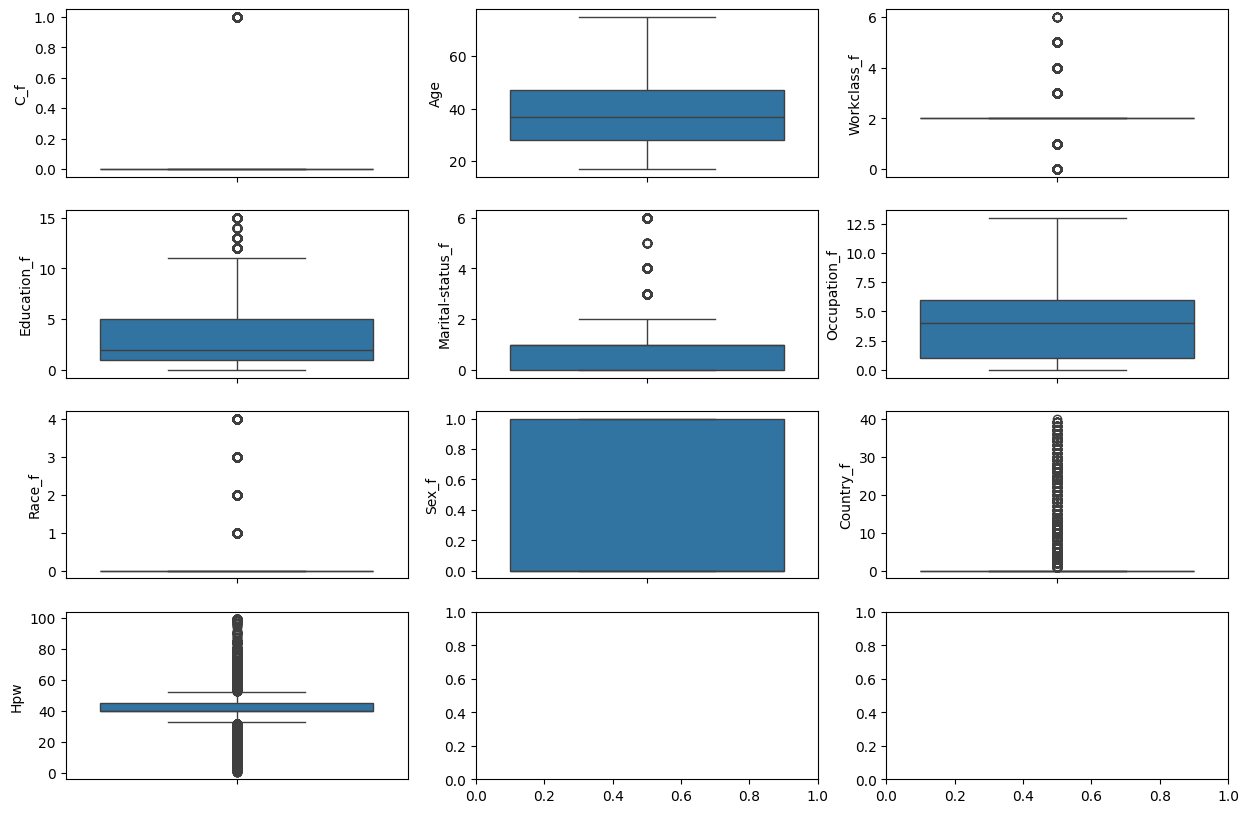

In [24]:
fig, axis = plt.subplots(4, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = data, y = "C_f")
sns.boxplot(ax = axis[0, 1], data = data, y = "Age")
sns.boxplot(ax = axis[0, 2], data = data, y = "Workclass_f")
sns.boxplot(ax = axis[1, 0], data = data, y = "Education_f")
sns.boxplot(ax = axis[1, 1], data = data, y = "Marital-status_f")
sns.boxplot(ax = axis[1, 2], data = data, y = "Occupation_f")
sns.boxplot(ax = axis[2, 0], data = data, y = "Race_f")
sns.boxplot(ax = axis[2, 1], data = data, y = "Sex_f")
sns.boxplot(ax = axis[2, 2], data = data, y = "Country_f")
sns.boxplot(ax = axis[3, 0], data = data, y = "Hpw")

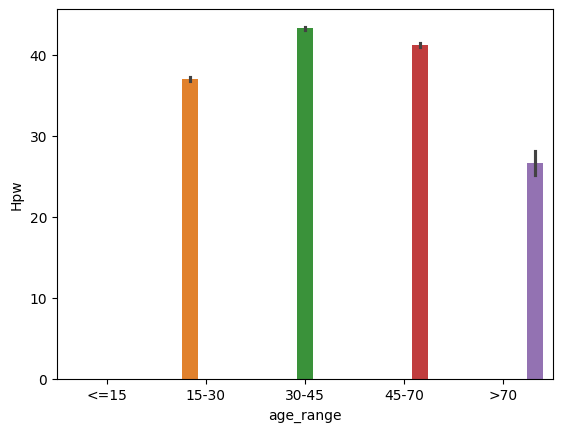

In [16]:
data['age_range'] = pd.cut(data['Age'],bins=[0,15,30,45,70, float('inf')],
                labels=['<=15', '15-30', '30-45','45-70','>70'],include_lowest=True)
sns.barplot(x='age_range',y='Hpw',hue='age_range',data=data)

plt.show()

<Axes: xlabel='age_range', ylabel='Count'>

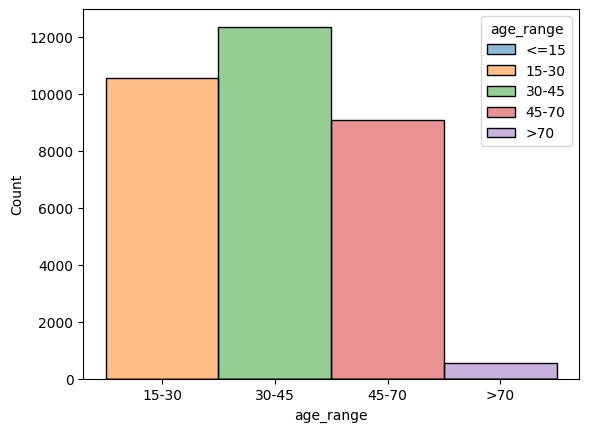

In [17]:
sns.histplot(x='age_range',hue='age_range',data=data)

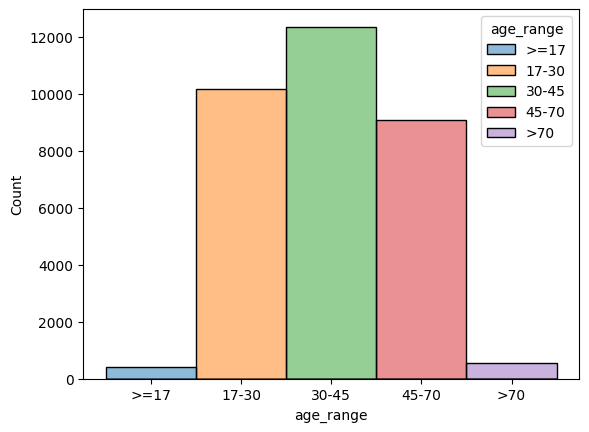

In [18]:
data['age_range'] = pd.cut(data['Age'],bins=[0,17,30,45,70, float('inf')],
                labels=['>=17', '17-30', '30-45','45-70','>70'],include_lowest=True)
sns.histplot(x='age_range',hue='age_range',data=data)

plt.show()